### Final Analysis Notebook
# --------------------------------------------------
#### Organized, polished sections for presentation/report
# --------------------------------------------------

### 1. Export Clean CSV

1. Data Overview
 - **Purpose**: Understand dataset structure and initial quality issues.
 - **Key Observations**:
   - Outliers detected in `co2_emissions` and `mileage`.
   - Data types corrected (e.g., `first_registration` to datetime).

In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [19]:
df = pd.read_csv('clean_data/berlingo_DE_2012_25_cleaned.csv')

In [20]:
# Convert to datetime (month/year format)
df['first_registration'] = pd.to_datetime(df['first_registration'], errors='coerce')


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1014 entries, 0 to 1013
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               1014 non-null   object        
 1   price               1014 non-null   int64         
 2   price_label         1014 non-null   object        
 3   mileage             1014 non-null   int64         
 4   first_registration  1014 non-null   datetime64[ns]
 5   transmission        1007 non-null   object        
 6   fuel_type           1014 non-null   object        
 7   power_kW            1014 non-null   int64         
 8   power_PS            1014 non-null   int64         
 9   consumption         839 non-null    float64       
 10  co2_emissions       811 non-null    float64       
 11  vehicle_type        1014 non-null   object        
 12  age_months          1014 non-null   int64         
 13  age_years           1014 non-null   int64       

In [22]:
display(df.sort_values('mileage', ascending=False))

,title,price,price_label,mileage,first_registration,transmission,fuel_type,power_kW,power_PS,consumption,co2_emissions,vehicle_type,age_months,age_years
805,Citroen Berlingo Niveau Kasten L2 1.6 HDi *Kli...,3490,Fairer Preis,499998,2015-07-01,Schaltgetriebe,Diesel,66,90,6.0,157.0,cargo,118,9
45,Citroen Berlingo Schaltung*Rollstuhl*Rampe*PDC...,7400,Erhöhter Preis,358000,2018-02-01,Schaltgetriebe,Diesel,88,120,4.3,NaN,minivan,87,7
1,Citroen Berlingo Kombi Selection,3480,Sehr guter Preis,324199,2014-04-01,Schaltgetriebe,Benzin,72,98,7.1,168.0,minivan,133,11
119,Citroen Berlingo Feel XL,10000,Fairer Preis,299000,2021-04-01,Schaltgetriebe,Diesel,96,131,4.3,113.0,minivan,49,4
816,Citroen Berlingo Berlingo 1.6 HDi L2 1.6 BlueH...,5000,Guter Preis,297250,2016-06-01,Automatik,Diesel,73,99,4.1,NaN,cargo,107,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
622,Citroen Berlingo M BlueHDi 100 PLUS,26890,Keine Angabe,0,2025-02-01,Schaltgetriebe,Diesel,75,102,6.3,139.0,minivan,3,0
764,"Citroen Berlingo MAX 136 100 kW (136 PS), Auto...",32537,Keine Angabe,0,2025-05-01,Automatik,Elektro,100,136,0.0,0.0,minivan,0,0
633,Citroen Berlingo 1.5 HDI EAT8 MPV Plus M Frei ...,26980,Keine Angabe,0,2025-05-01,Automatik,Diesel,96,131,5.8,152.0,minivan,0,0
964,Citroen Berlingo Kasten L2H1 1.5 BlueHDi 100 D...,20813,Keine Angabe,0,2025-05-01,Schaltgetriebe,Diesel,75,102,6.1,161.0,cargo,0,0


### 2. Exploratory Data Analysis (EDA)



2. Initial Data Exploration
 - **Key Visualizations**:
   - Distributions of key variables (price, registration year).
   - Outlier identification.

In [23]:
df.describe()


,price,mileage,first_registration,power_kW,power_PS,consumption,co2_emissions,age_months,age_years
count,1014.000000,1014.000000,1014,1014.000000,1014.000000,839.000000,811.000000,1014.000000,1014.000000
mean,18599.454635,70081.418146,2020-06-04 15:04:36.923077120,83.908284,114.195266,4.719905,118.187423,58.875740,4.496055
min,2000.000000,0.000000,2012-01-01 00:00:00,35.000000,48.000000,0.000000,0.000000,0.000000,0.000000
25%,11750.000000,8548.750000,2018-01-01 00:00:00,75.000000,102.000000,4.300000,113.000000,20.000000,1.000000
50%,17995.000000,62886.500000,2020-05-01 00:00:00,81.000000,110.000000,5.300000,126.000000,60.000000,5.000000
75%,25391.250000,111475.000000,2023-09-01 00:00:00,96.000000,131.000000,5.800000,146.000000,88.000000,7.000000
max,41590.000000,499998.000000,2025-05-01 00:00:00,100.000000,136.000000,7.600000,1495.000000,160.000000,13.000000
std,8296.727719,64984.875679,NaN,11.849187,16.272462,1.944074,68.078200,42.456323,3.498340


There are obvious outliers in 'co2_emissions' (an error) and in 'mileage' (a car that was extremely used)

In [24]:
df.columns


Index(['title', 'price', 'price_label', 'mileage', 'first_registration',
       'transmission', 'fuel_type', 'power_kW', 'power_PS', 'consumption',
       'co2_emissions', 'vehicle_type', 'age_months', 'age_years'],
      dtype='object')

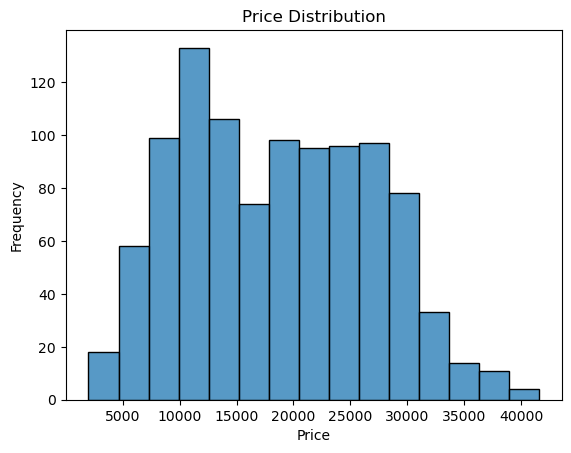

Missing values in each column:
title                   0
price                   0
price_label             0
mileage                 0
first_registration      0
transmission            7
fuel_type               0
power_kW                0
power_PS                0
consumption           175
co2_emissions         203
vehicle_type            0
age_months              0
age_years               0
dtype: int64


In [25]:
sns.histplot(data=df, x='price')
plt.title('Price Distribution')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


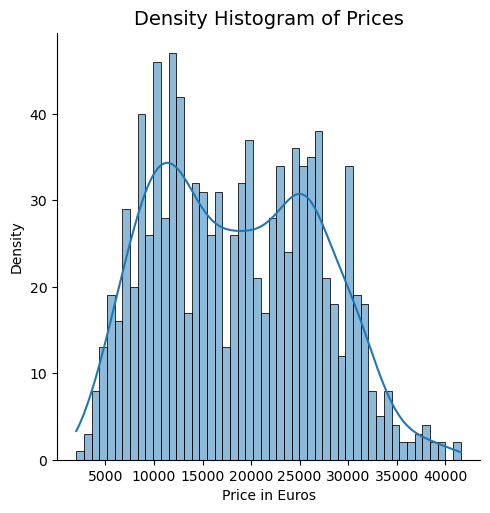

In [26]:
sns.displot(df, x='price', kde=True, bins=50)
plt.title('Density Histogram of Prices', fontsize=14)
plt.xlabel('Price in Euros')
plt.ylabel('Density')
plt.show()

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


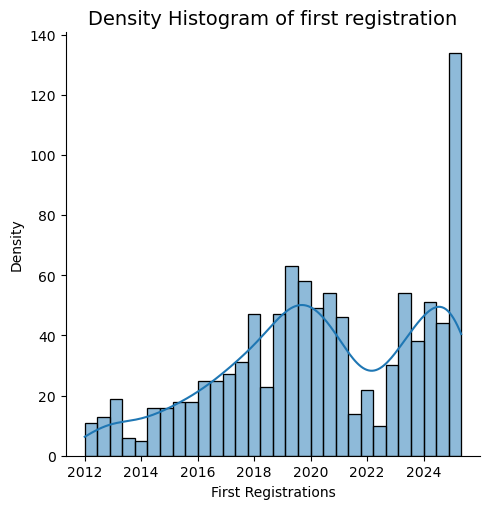

In [27]:
sns.displot(df, x='first_registration', kde=True, bins=30)
plt.title('Density Histogram of first registration', fontsize=14)
plt.xlabel('First Registrations')
plt.ylabel('Density')
plt.show()

### Dealing with an Outliers in CO2 Emissions that was an obvious error
Replacing the outlier with the mean

In [28]:
# Calculate mean CO2 excluding values above 250
co2_mean = df.loc[df['co2_emissions'] <= 250, 'co2_emissions'].mean()

# Replace outliers with the mean
df['co2_emissions'] = df['co2_emissions'].mask(
    df['co2_emissions'] > 250, co2_mean
)

### Dealing with Km Outlier (one car that has 500k km)

a: Handle the 500,000 km Mileage Outlier



In [29]:
# Create a modified copy of the original DataFrame
df_clean = df.copy()

# Extract the outlier into a separate DataFrame (from the original)
outlier_mask = df['mileage'] >= 450_000
outlier_df = df[outlier_mask].copy()
outlier_df

,title,price,price_label,mileage,first_registration,transmission,fuel_type,power_kW,power_PS,consumption,co2_emissions,vehicle_type,age_months,age_years
805,Citroen Berlingo Niveau Kasten L2 1.6 HDi *Kli...,3490,Fairer Preis,499998,2015-07-01,Schaltgetriebe,Diesel,66,90,6.0,157.0,cargo,118,9


In [30]:
# Calculate mean mileage per year (EXCLUDING the outlier)
yearly_mean_mileage = (
    df_clean[~outlier_mask]  # Work on the modified DF, exclude outlier
    .groupby('first_registration')['mileage']
    .mean()
    .rename('mean_mileage_per_year')
)
yearly_mean_mileage

first_registration
2012-01-01    137623.333333
2012-02-01    194947.000000
2012-03-01    114179.500000
2012-04-01    265000.000000
2012-05-01    190280.500000
                  ...      
2025-01-01       913.714286
2025-02-01       437.500000
2025-03-01       720.538462
2025-04-01       781.818182
2025-05-01        39.113636
Name: mean_mileage_per_year, Length: 155, dtype: float64

In [31]:
# Merge yearly mean into the modified DF
df_clean = df_clean.merge(
    yearly_mean_mileage, 
    left_on='first_registration', 
    right_index=True, 
    how='left'
)

# Replace outlier's mileage with its year's mean
df_clean.loc[outlier_mask, 'mileage'] = df_clean.loc[outlier_mask, 'mean_mileage_per_year']

# Cleanup: Remove helper column
# df_clean = df_clean.drop(columns='mean_mileage_per_year')

In [32]:
# Check original DF (outlier unchanged)
print("Original DF outlier mileage:", df.loc[outlier_mask, 'mileage'].values[0])

# Check modified DF (outlier replaced)
print("Modified DF outlier mileage:", df_clean.loc[outlier_mask, 'mileage'].values[0])

# Check outlier DF
print("Outlier DF:", outlier_df)

Original DF outlier mileage: 499998
Modified DF outlier mileage: 130500
Outlier DF:                                                  title  price   price_label  \
805  Citroen Berlingo Niveau Kasten L2 1.6 HDi *Kli...   3490  Fairer Preis   

     mileage first_registration    transmission fuel_type  power_kW  power_PS  \
805   499998         2015-07-01  Schaltgetriebe    Diesel        66        90   

     consumption  co2_emissions vehicle_type  age_months  age_years  
805          6.0          157.0        cargo         118          9  


---
Plot mileage vs Price

If i want to know how the car should be the mean per year

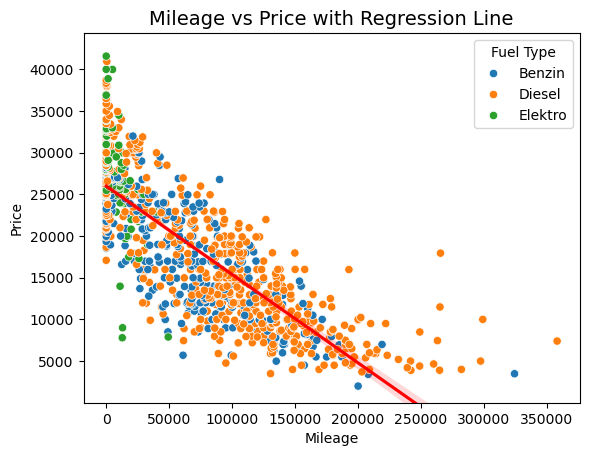

In [33]:
# visualize the data (problem is that )
sns.scatterplot(data=df_clean, x='mileage', y='price', hue='fuel_type')
sns.regplot(data=df_clean, x='mileage', y='price', scatter=False, color='red')
plt.ylim(bottom=min(df_clean['mileage'].min(), 0) + 1)  # Ensures y-axis starts above 0
plt.title('Mileage vs Price with Regression Line', fontsize=14)
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

#### How do i make it clear how to read this log scale?

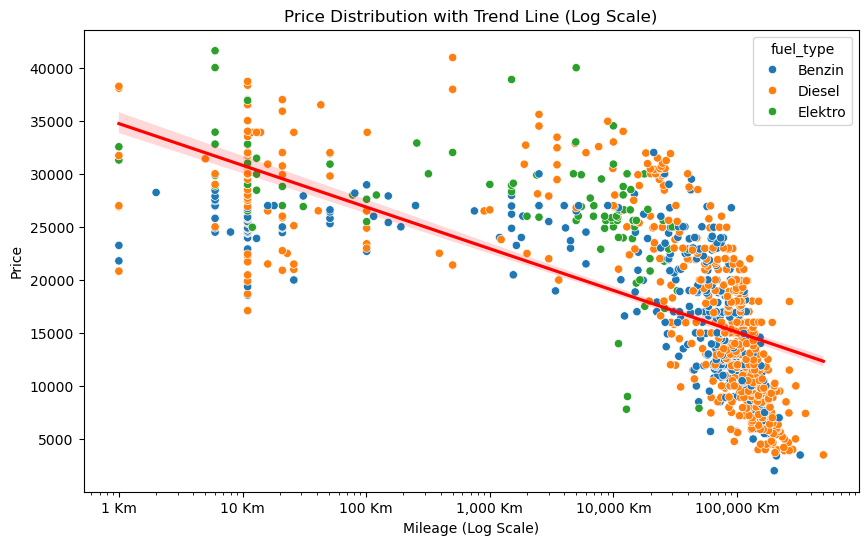

In [34]:
# Define a small constant (e.g., 1) to add to mileage to avoid log(0)
df['mileage_adjusted'] = df['mileage'] + 1

# Plotting scatter plot with a trend line for adjusted data
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage_adjusted', y='price', hue='fuel_type')

# Add a regression line, with log scale for adjusted mileage
sns.regplot(data=df, x='mileage_adjusted', y='price', scatter=False, color='red', logx=True)

plt.xscale('log')
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,} Km'))  # Adjust labels back by 1

plt.title('Price Distribution with Trend Line (Log Scale)')
plt.xlabel('Mileage (Log Scale)')
plt.ylabel('Price')
plt.show()

<Axes: >

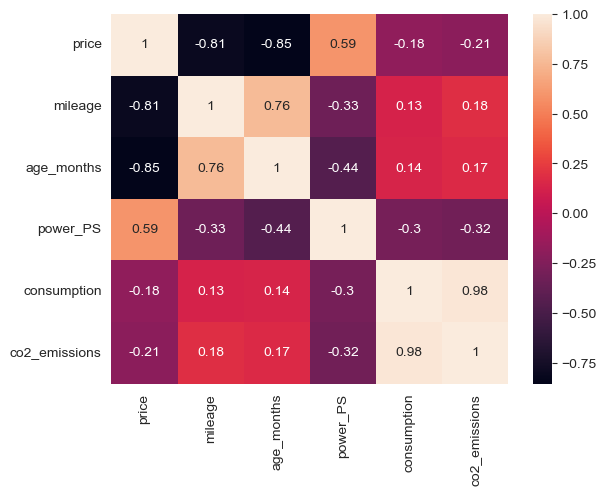

In [54]:
sns.heatmap(df[['price', 'mileage', 'age_months', 'power_PS', 'consumption', 'co2_emissions']].corr(), annot=True)

3. Answer Business Questions

“Do Diesel Berlingos cost more than Petrol ones?” What about comparing to minivan or cargo van?

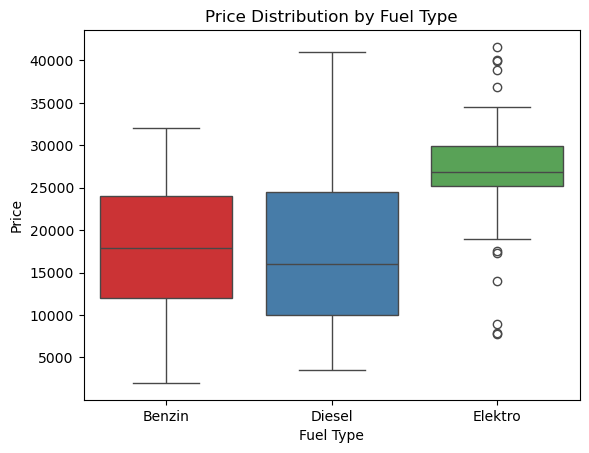

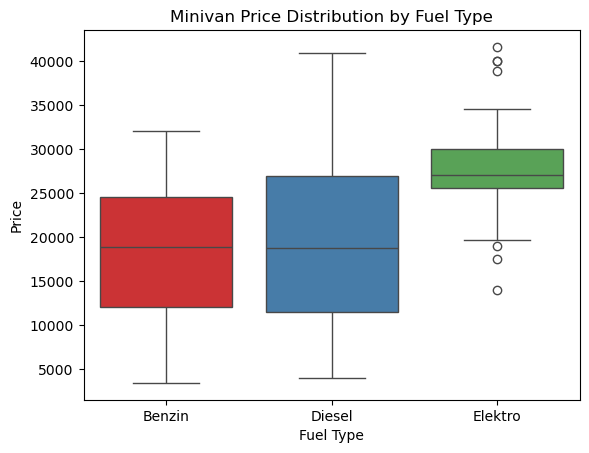

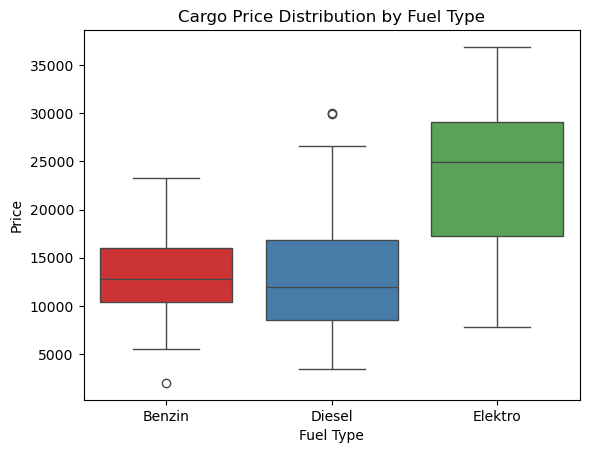

In [36]:
# Compare the price distribution across different fuel types for all the cars and for minivan and cargo (3 set of plots)
# 3 sets of plots with different pallets

# Get unique fuel types and create a sub-palette for them
unique_fuel_types = df['fuel_type'].unique()
n_fuel_types = len(unique_fuel_types)

# Define distinct palettes, ensuring they match the number of unique fuel types
palette_general = sns.color_palette("Set1", n_colors=n_fuel_types)
palette_minivan = sns.color_palette("Set2", n_colors=n_fuel_types)
palette_cargo = sns.color_palette("Set3", n_colors=n_fuel_types)

# General price distribution
sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)  # Hide legend placeholder for consistent look
plt.show()

# Minivan price distribution
df_minivan = df[df['vehicle_type'] == 'minivan']
sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Minivan Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)
plt.show()

# Cargo price distribution
df_cargo = df[df['vehicle_type'] == 'cargo']
sns.boxplot(data=df_cargo, x='fuel_type', y='price', palette=palette_general, hue='fuel_type', dodge=False)
plt.title('Cargo Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.legend([],[], frameon=False)
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/2301483305.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_dict, ax=axes[0])
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/2301483305.py:21: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_dict, ax=axes[1])
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/2301483305.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cargo,

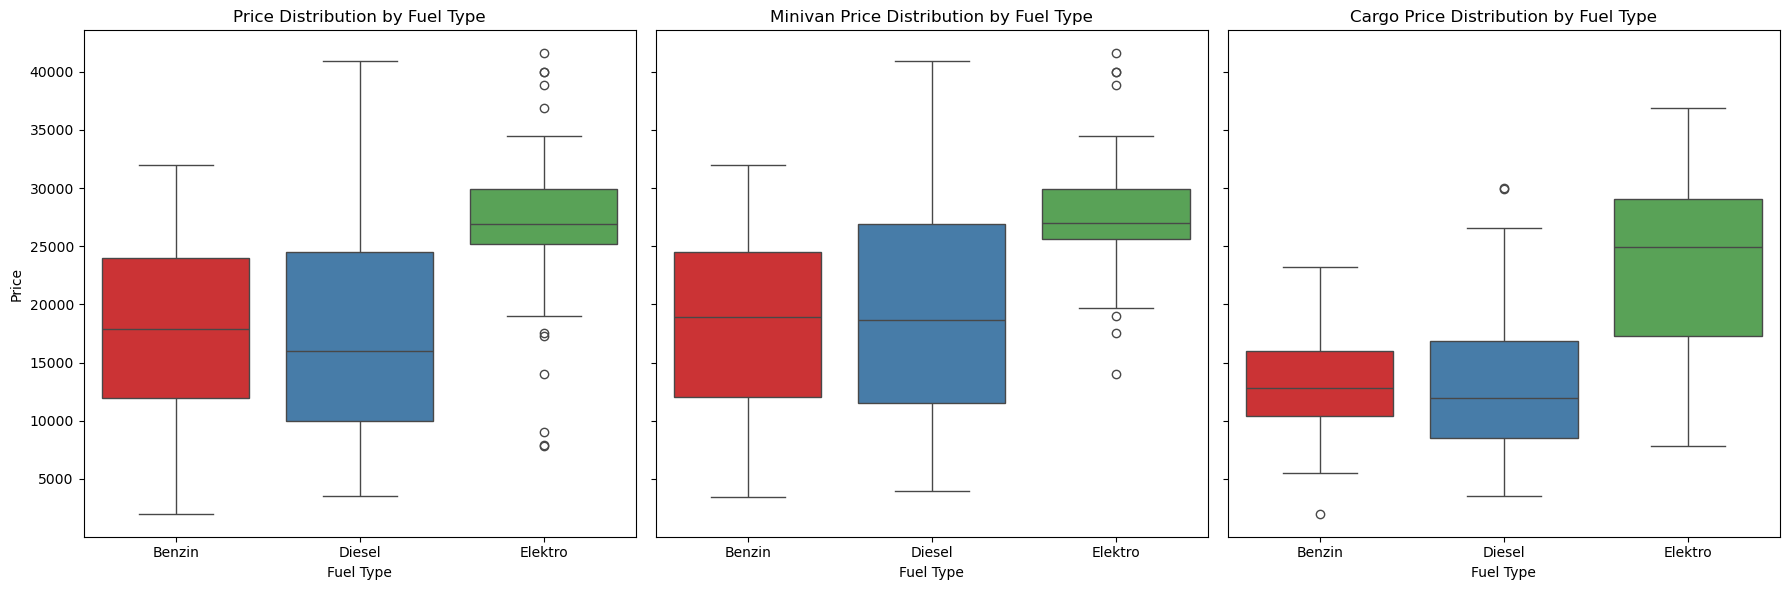

In [37]:
# Get unique fuel types
unique_fuel_types = df['fuel_type'].unique()

# Create a common color palette for fuel types
common_palette = sns.color_palette("Set1", n_colors=len(unique_fuel_types))

# Map each fuel type to a color
palette_dict = dict(zip(unique_fuel_types, common_palette))

# Create a figure with 3 subplots in 1 row
fig, axes = plt.subplots(1, 3, figsize=(18, 6), sharey=True)

# General price distribution
sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_dict, ax=axes[0])
axes[0].set_title('Price Distribution by Fuel Type')
axes[0].set_xlabel('Fuel Type')
axes[0].set_ylabel('Price')

# Minivan price distribution
df_minivan = df[df['vehicle_type'] == 'minivan']
sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_dict, ax=axes[1])
axes[1].set_title('Minivan Price Distribution by Fuel Type')
axes[1].set_xlabel('Fuel Type')

# Cargo price distribution
df_cargo = df[df['vehicle_type'] == 'cargo']
sns.boxplot(data=df_cargo, x='fuel_type', y='price', palette=palette_dict, ax=axes[2])
axes[2].set_title('Cargo Price Distribution by Fuel Type')
axes[2].set_xlabel('Fuel Type')

# Adjust layout
plt.tight_layout()
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/827936046.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_dict, ax=ax0)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/827936046.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_dict, ax=ax1)
/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/827936046.py:34: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_cargo, x='fuel_ty

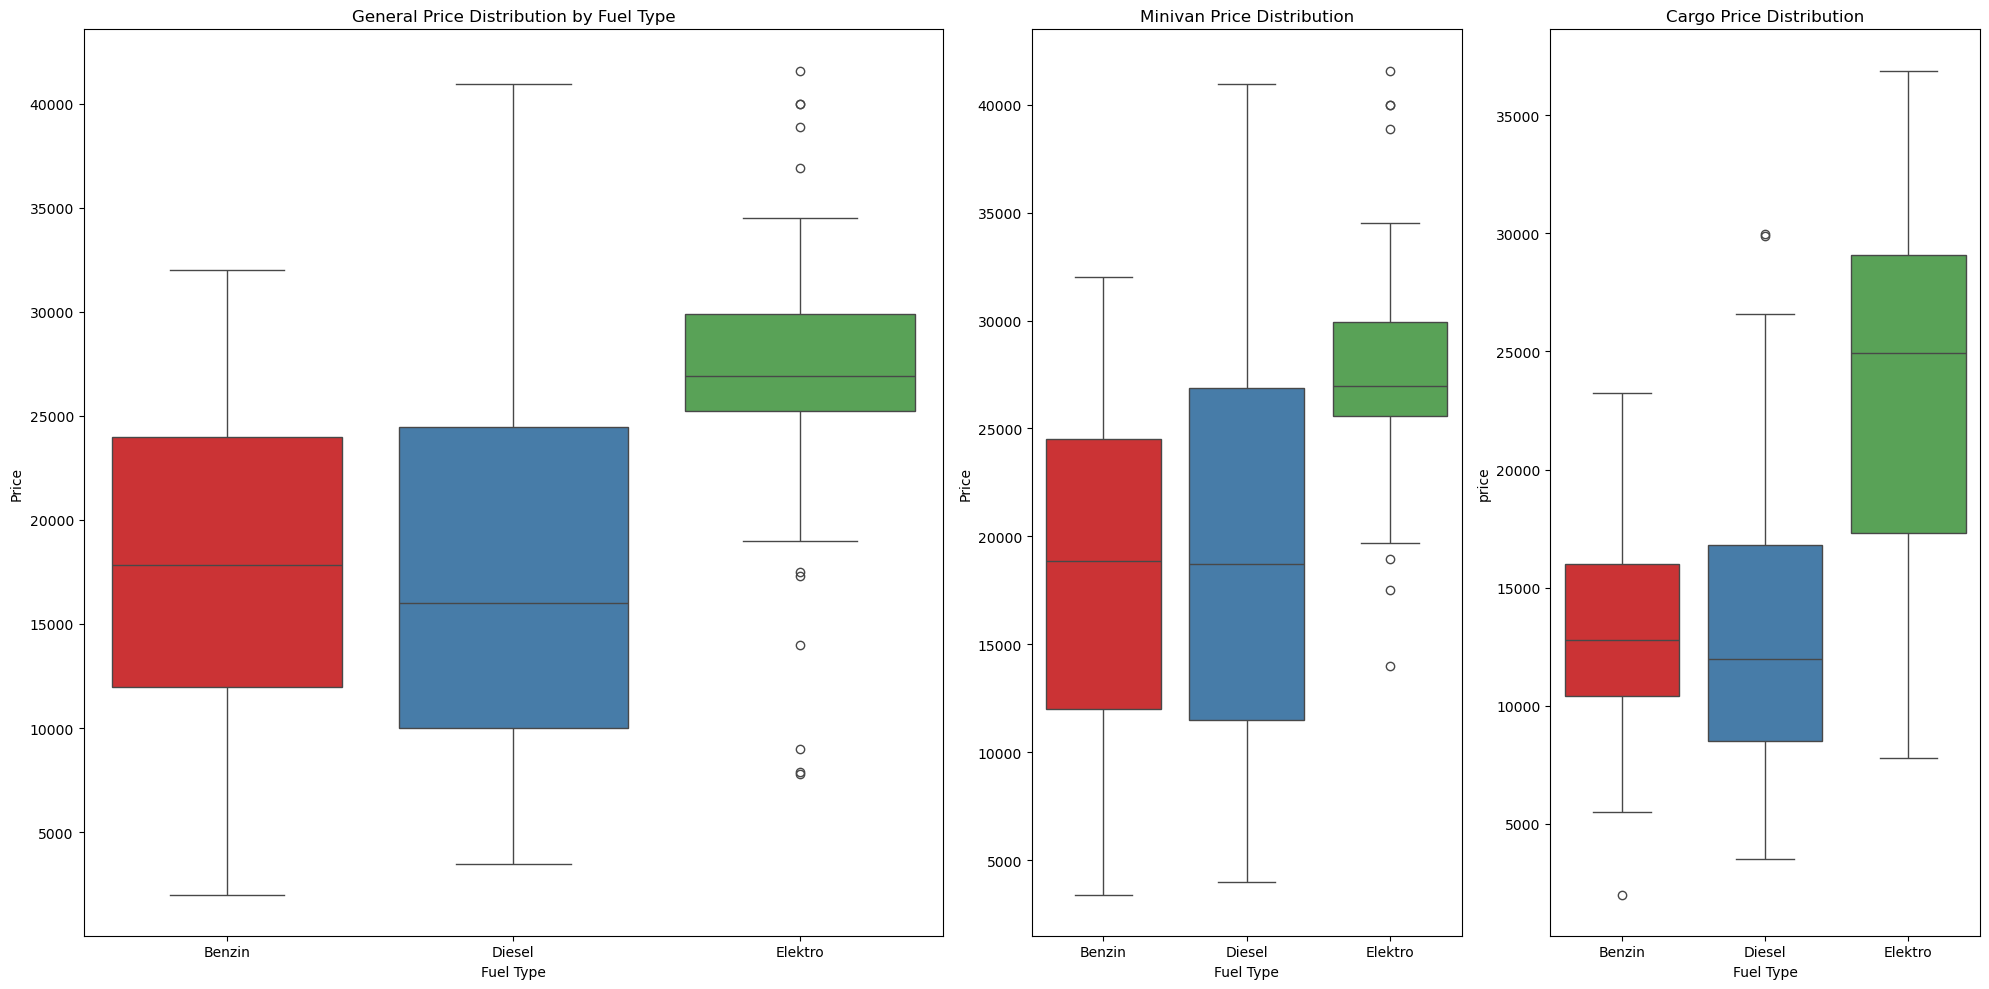

In [38]:
import matplotlib.gridspec as gridspec

# Get unique fuel types
unique_fuel_types = df['fuel_type'].unique()

# Create a common color palette for fuel types
common_palette = sns.color_palette("Set1", n_colors=len(unique_fuel_types))

# Map each fuel type to a color
palette_dict = dict(zip(unique_fuel_types, common_palette))

# Set up the figure using gridspec
fig = plt.figure(figsize=(20, 10))
gs = gridspec.GridSpec(1, 3, width_ratios=[2, 1, 1]) # Make the first plot larger

# General price distribution
ax0 = plt.subplot(gs[0])
sns.boxplot(data=df, x='fuel_type', y='price', palette=palette_dict, ax=ax0)
ax0.set_title('General Price Distribution by Fuel Type')
ax0.set_xlabel('Fuel Type')
ax0.set_ylabel('Price')

# Minivan price distribution
df_minivan = df[df['vehicle_type'] == 'minivan']
ax1 = plt.subplot(gs[1])
sns.boxplot(data=df_minivan, x='fuel_type', y='price', palette=palette_dict, ax=ax1)
ax1.set_title('Minivan Price Distribution')
ax1.set_xlabel('Fuel Type')
ax1.set_ylabel('Price')  # Only if necessary for comprehension

# Cargo price distribution
df_cargo = df[df['vehicle_type'] == 'cargo']
ax2 = plt.subplot(gs[2])
sns.boxplot(data=df_cargo, x='fuel_type', y='price', palette=palette_dict, ax=ax2)
ax2.set_title('Cargo Price Distribution')
ax2.set_xlabel('Fuel Type')

# Adjust layout
plt.tight_layout()
plt.savefig(f'output/price_fueltype_all.png')
plt.show()

“How does mileage affect price for automatic vs. manual transmissions?”

/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


(1.0, 44237.322346044566)

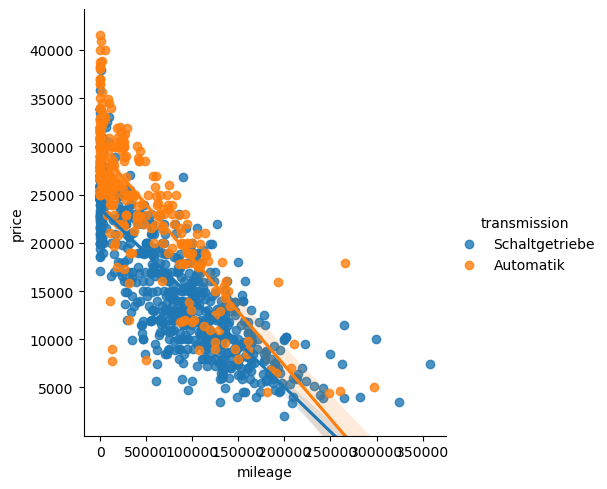

In [39]:
sns.lmplot(data=df_clean, x='mileage', y='price', hue='transmission')
plt.ylim(bottom=min(df_clean['mileage'].min(), 0) + 1)


/opt/anaconda3/envs/datasci_env/lib/python3.8/site-packages/seaborn/axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


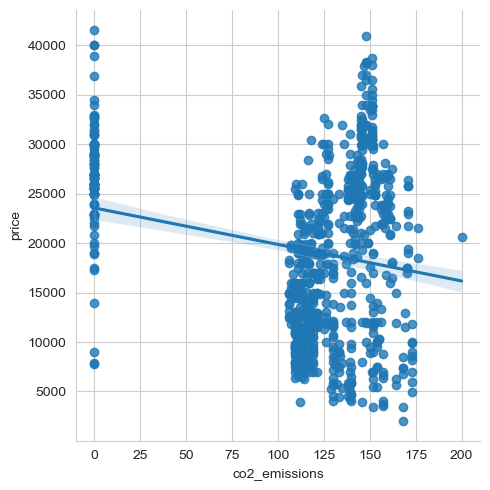

In [53]:
sns.lmplot(data=df, x='co2_emissions', y='price') #, hue='transmission')

“Are newer cars (lower age) priced significantly higher?”

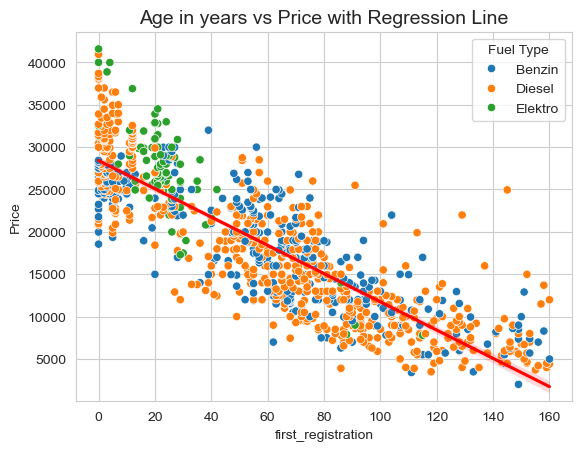

In [66]:
# visualize the data (problem is that )
sns.scatterplot(data=df, x='age_months', y='price', hue='fuel_type')
sns.regplot(data=df, x='age_months', y='price', scatter=False, color='red')
plt.ylim(bottom=min(df['age_months'].min(), 0) + 1)  # Ensures y-axis starts above 0
plt.title('Age in years vs Price with Regression Line', fontsize=14)
plt.xlabel('first_registration')
plt.ylabel('Price')
plt.legend(title='Fuel Type')
plt.show()

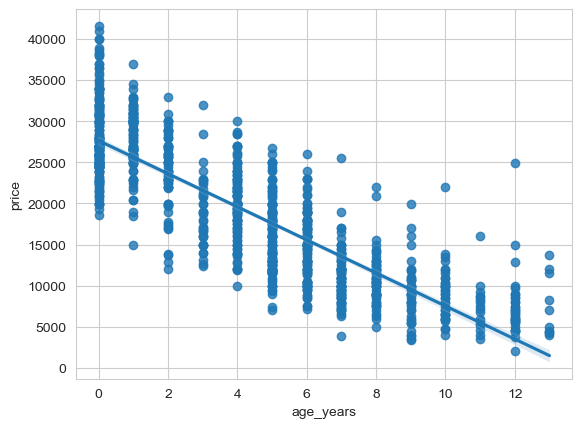

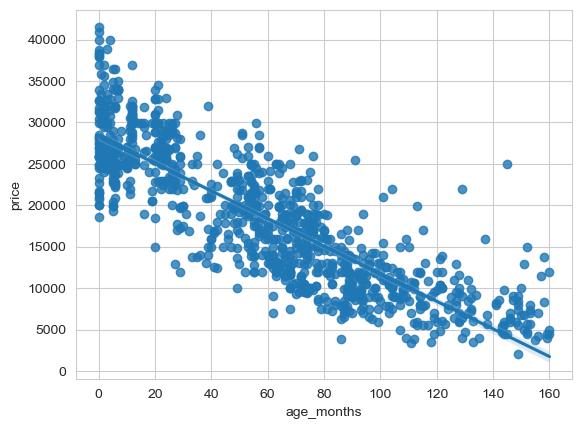

In [41]:
sns.set_style("whitegrid")
sns.regplot(data=df, x='age_years', y='price')
plt.show()
sns.regplot(data=df, x='age_months', y='price')
plt.show()

/var/folders/tx/45hhw1yn48jfdqn2hmnhbhvw0000gn/T/ipykernel_80197/2149682061.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(


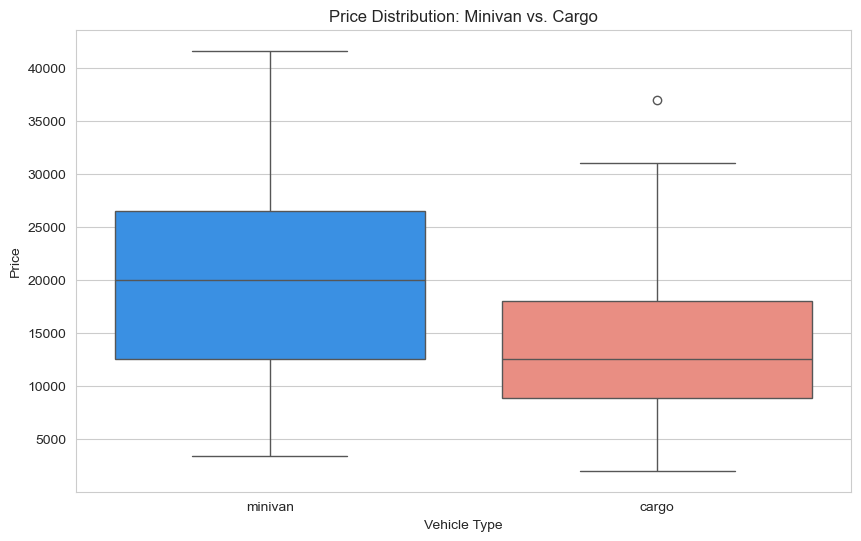

In [42]:
# Define a custom color palette
custom_palette = {
    'minivan': 'dodgerblue',
    'cargo': 'salmon'
}

# Plot with custom colors for vehicle types
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df, 
    x='vehicle_type', 
    y='price',
    order=['minivan', 'cargo'],  # Ensure consistent ordering
    palette=custom_palette
)
plt.title("Price Distribution: Minivan vs. Cargo")
plt.xlabel('Vehicle Type')
plt.ylabel('Price')
plt.show()

## Detecting Outliers

In [43]:
def identify_outliers_iqr(df, column, threshold=1.5):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - threshold * IQR
    upper_bound = Q3 + threshold * IQR
    
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]

    # print(f"\nIQR Method: outliers detected: {len(outliers)} (bounds: {lower_bound:.2f} to {upper_bound:.2f})")

    return outliers, lower_bound, upper_bound, IQR

- Price IQR Outliers
- Co2 Emissiongs IQR Outliers
- Mileage IQR Outliers

In [44]:
# identify_outliers_iqr(df, 'price')

# Apply IQR method:
price_outliers, price_lower, price_upper, price_iqr = identify_outliers_iqr(df, 'price')
co2_outliers, co2_lower, co2_upper, co2_iqr = identify_outliers_iqr(df, 'co2_emissions')
mileage_outliers, mileage_lower, mileage_upper, mileage_iqr = identify_outliers_iqr(df, 'mileage')

print(f"\nIQR Method: Price outliers detected: {len(price_outliers)} IRQ {price_iqr} (bounds: {price_lower:.2f} to {price_upper:.2f})")
print(f"\nIQR Method: Co2 outliers detected: {len(co2_outliers)} IRQ {co2_iqr} (bounds: {co2_lower:.2f} to {co2_upper:.2f})")
print(f"\nIQR Method: Mileage outliers detected: {len(mileage_outliers)} IQR {mileage_iqr} (bounds: {mileage_lower:.2f} to {mileage_upper:.2f})")



IQR Method: Price outliers detected: 0 IRQ 13641.25 (bounds: -8711.88 to 45853.12)

IQR Method: Co2 outliers detected: 105 IRQ 33.0 (bounds: 63.50 to 195.50)

IQR Method: Mileage outliers detected: 6 IQR 102926.25 (bounds: -145840.62 to 265864.38)


Once i detected the outliers how do i know which ones are outliers? how to filter them?

In [45]:
display(identify_outliers_iqr(df, 'co2_emissions'))

(                                                  title  price  \
 234     Citroen Berlingo Full Electric Multispace Shine  13980   
 331   Citroen Berlingo Live Pack Elektromotor M 136 ...  17500   
 361   Citroen Berlingo M PureTech 130 EAT8 SHINE *HU...  18880   
 367   Citroen Berlingo Berlingo M Elektro 136 LIVE P...  18970   
 386   Citroen Berlingo eBerlingo M LivePack Elektro ...  19690   
 ...                                                 ...    ...   
 994        Citroen Berlingo e-Berlingo L1 EHZ  (50 kWh)  25990   
 997             Citroen Berlingo L1 Elektro 50 kWh Kawa  29096   
 998   Citroen Berlingo Kasten Elektromotor L1 Fin.ab...  29500   
 1001         Citroen Berlingo XL Elektromotor 136 Shine  30990   
 1002  Citroen Berlingo Kasten 136 L2 Basis Elektromo...  36900   
 
            price_label  mileage first_registration transmission fuel_type  \
 234     Erhöhter Preis    11000         2018-03-01    Automatik   Elektro   
 331   Sehr guter Preis    17950      

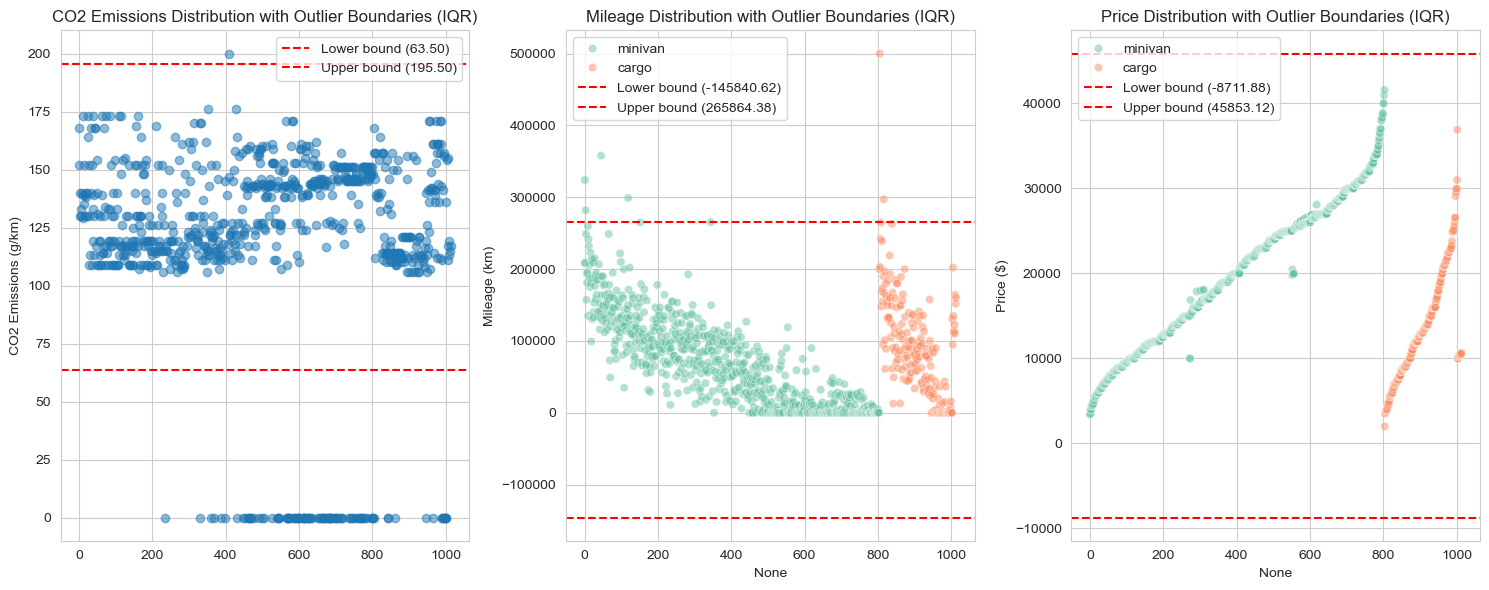

In [46]:
plt.figure(figsize=(15, 6))
# Use sns.scatterplot to include hue
# Create a palette dictionary for vehicle_type
vehicle_types = df['vehicle_type'].unique()
vehicle_palette_dict = dict(zip(vehicle_types, sns.color_palette("Set2", len(vehicle_types))))

# CO2 Emissions Outliers
plt.subplot(1, 3, 1)
# plt.scatter(filtered_df.index, filtered_df['co2_emissions'], alpha=0.5)
plt.scatter(df.index, df['co2_emissions'], alpha=0.5)
plt.axhline(y=co2_lower, color='r', linestyle='--', label=f'Lower bound ({co2_lower:.2f})')
plt.axhline(y=co2_upper, color='r', linestyle='--', label=f'Upper bound ({co2_upper:.2f})')
plt.title('CO2 Emissions Distribution with Outlier Boundaries (IQR)')
plt.ylabel('CO2 Emissions (g/km)')
plt.legend()

# Mileage Outliers, starting y-axis at a positive value
plt.subplot(1, 3, 2)
# plt.scatter(filtered_df.index, filtered_df['mileage'], alpha=0.5)
sns.scatterplot(data=df, x=df.index, y='mileage', hue='vehicle_type', alpha=0.5, palette=vehicle_palette_dict)
plt.axhline(y=mileage_lower, color='r', linestyle='--', label=f'Lower bound ({mileage_lower:.2f})')
plt.axhline(y=mileage_upper, color='r', linestyle='--', label=f'Upper bound ({mileage_upper:.2f})')
plt.title('Mileage Distribution with Outlier Boundaries (IQR)')
plt.ylabel('Mileage (km)')
plt.legend()

# Price Outliers
plt.subplot(1, 3, 3)

sns.scatterplot(data=df, x=df.index, y='price', hue='vehicle_type', alpha=0.5, palette=vehicle_palette_dict)
plt.axhline(y=price_lower, color='r', linestyle='--', label=f'Lower bound ({price_lower:.2f})')
plt.axhline(y=price_upper, color='r', linestyle='--', label=f'Upper bound ({price_upper:.2f})')
plt.title('Price Distribution with Outlier Boundaries (IQR)')
plt.ylabel('Price ($)')
plt.legend()

plt.tight_layout()
plt.show()

In [47]:
def identify_outliers_zscore(df, column, threshold=3):
    """Identify outliers using Z-scores for a given column."""
    z_scores = stats.zscore(df[column])
    outliers = df[abs(z_scores) > threshold]
    return outliers

In [48]:
# identify_outliers_zscore(df, 'price')

price_outliers_z = identify_outliers_zscore(df, 'price')
co2_outliers_z = identify_outliers_zscore(df, 'co2_emissions')
mileage_outliers_z = identify_outliers_zscore(df, 'mileage')

print(f"Z-score Method: Price outliers detected: {len(price_outliers_z)}")
print(f"Z-score Method: Co2 outliers detected: {len(co2_outliers_z)}")
print(f"Z-score Method: Mileage outliers detected: {len(mileage_outliers_z)}")

Z-score Method: Price outliers detected: 0
Z-score Method: Co2 outliers detected: 0
Z-score Method: Mileage outliers detected: 8


### Filter non electric cars

In [49]:
# Filter non-electric cars
non_electric = df[df['fuel_type'] != 'Elektro']

# Calculate IQR for CO2 emissions
Q1 = non_electric['co2_emissions'].quantile(0.25)
Q3 = non_electric['co2_emissions'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
co2_outliers = non_electric[
    (non_electric['co2_emissions'] < lower_bound) | 
    (non_electric['co2_emissions'] > upper_bound)
]
print("CO2 Outliers:", len(co2_outliers))

CO2 Outliers: 6


---------

### DRAFT / Working Code

<class 'pandas.core.frame.DataFrame'>
Index: 702 entries, 0 to 1013
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   title               702 non-null    object        
 1   price               702 non-null    int64         
 2   price_label         702 non-null    object        
 3   mileage             702 non-null    int64         
 4   first_registration  702 non-null    datetime64[ns]
 5   transmission        696 non-null    object        
 6   fuel_type           702 non-null    object        
 7   power_kW            702 non-null    int64         
 8   power_PS            702 non-null    int64         
 9   consumption         693 non-null    float64       
 10  co2_emissions       702 non-null    float64       
 11  vehicle_type        702 non-null    object        
 12  age_months          702 non-null    int64         
 13  age_years           702 non-null    int64         
 14

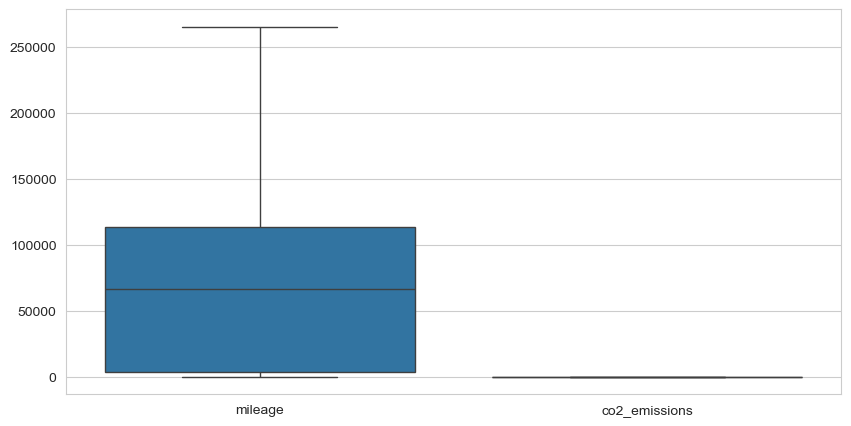

In [50]:
# Compute Q1 (25th percentile) and Q3 (75th percentile) for mileage
Q1_mileage = df['mileage'].quantile(0.25)
Q3_mileage = df['mileage'].quantile(0.75)
IQR_mileage = Q3_mileage - Q1_mileage

# Define bounds for mileage outliers
lower_bound_mileage = Q1_mileage - 1.5 * IQR_mileage
upper_bound_mileage = Q3_mileage + 1.5 * IQR_mileage

# Filter out mileage outliers
filtered_df = df[(df['mileage'] >= lower_bound_mileage) & (df['mileage'] <= upper_bound_mileage)]

# Repeat similar steps for co2_emissions
Q1_co2 = filtered_df['co2_emissions'].quantile(0.25)
Q3_co2 = filtered_df['co2_emissions'].quantile(0.75)
IQR_co2 = Q3_co2 - Q1_co2

# Define bounds for co2 emissions outliers
lower_bound_co2 = Q1_co2 - 1.5 * IQR_co2
upper_bound_co2 = Q3_co2 + 1.5 * IQR_co2

# Further filter out co2_emissions outliers
filtered_df = filtered_df[(filtered_df['co2_emissions'] >= lower_bound_co2) & (filtered_df['co2_emissions'] <= upper_bound_co2)]

# If you know the specific erroneous extreme emission value, you can directly filter it as well
# Example of removing a known bad data point directly
filtered_df = filtered_df[filtered_df['co2_emissions'] != 1495.0 ]

# Let's see the shape or summary of the filtered DataFrame
print(filtered_df.info())

plt.figure(figsize=(10, 5))
sns.boxplot(data=filtered_df[['mileage', 'co2_emissions']])
plt.show()

<Axes: xlabel='fuel_type', ylabel='price'>

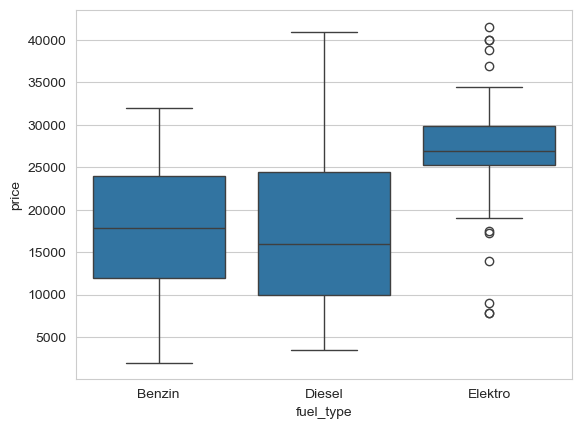

In [51]:
sns.boxplot(data=df, x='fuel_type', y='price')

Text(0, 0.5, 'price')

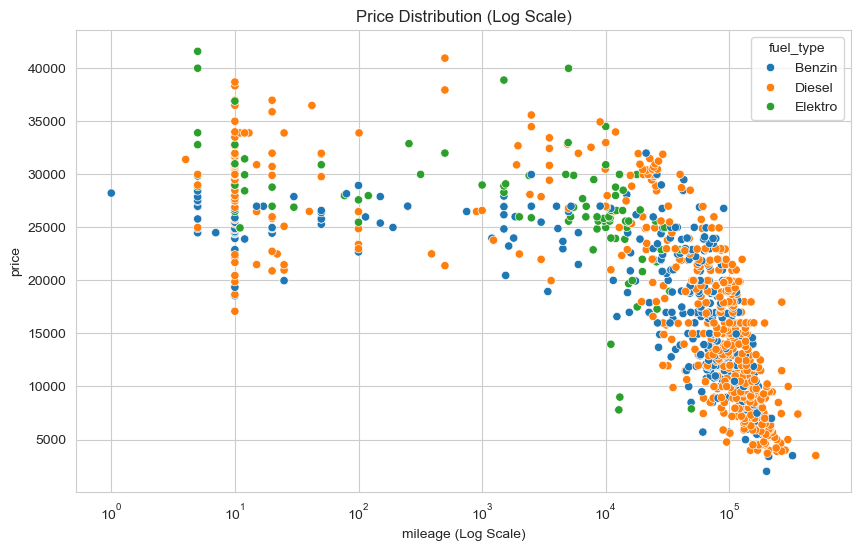

In [52]:
import matplotlib.ticker as ticker

# Plot
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='mileage', y='price', hue='fuel_type')
plt.xscale('log')
plt.title('Price Distribution (Log Scale)')
plt.xlabel('mileage (Log Scale)')
plt.ylabel('price')